**Contents**

1. Importing libraries
2. Importing dataset and quick look at data structure
3. Creating the test set
4. Data analysis and preprocessing on train set
   A. Spotting the outliers
   B. Looking for correlations 
   C. Feature selection
   D. Dealing with data imbalance
5. Setting up models and evaluation metrics
   A. Gaussian Naive Bayes classifier
   B. Support Vector Machine(SVM)classifier
   C. Logistic Regression classifier
   D. Decision Tree classifier
   E. Adaboost classifier
   F. Random Forest classifier
   G. Balanced Bagging classifier
   H. Selecting evaluation metrics
6. Selecting modesl and fine_tuning hyperparameters
7. Evaluate final models on test set




1. Importing libraries

In [130]:
#basic libraries for data wrangling, plotting and feature selections
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import pearsonr

from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from collections import OrderedDict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV






2. Importing dataset and quick look at data structure

The data set can be found here on the Kaggle website:https://www.kaggle.com/c/companies-bankruptcy-forecast

The bankruptcy_Train 2.csv has 10,000 rows of companies information and target column of 1 being bankrupt and 0 being not bankrupt. The test.csv, however, does not provide the target colum. Thus, I will use the bankruptcy_Train 2.csv as whole dataset for this project.

In [6]:
#load the 10,000 companies dataset
df = pd.read_csv('/Users/irislu/Downloads/capstone1 bankruptcy/train 10000/bankruptcy_Train 2.csv')

In [7]:
df.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
Attr1     10000 non-null float64
Attr2     10000 non-null float64
Attr3     10000 non-null float64
Attr4     10000 non-null float64
Attr5     10000 non-null float64
Attr6     10000 non-null float64
Attr7     10000 non-null float64
Attr8     10000 non-null float64
Attr9     10000 non-null float64
Attr10    10000 non-null float64
Attr11    10000 non-null float64
Attr12    10000 non-null float64
Attr13    10000 non-null float64
Attr14    10000 non-null float64
Attr15    10000 non-null float64
Attr16    10000 non-null float64
Attr17    10000 non-null float64
Attr18    10000 non-null float64
Attr19    10000 non-null float64
Attr20    10000 non-null float64
Attr21    10000 non-null float64
Attr22    10000 non-null float64
Attr23    10000 non-null float64
Attr24    10000 non-null float64
Attr25    10000 non-null float64
Attr26    10000 non-null float64
Attr27    10000 non-null float64
A

In [8]:
# The data seems need some feature scaling although it is not too serious because they are all ratios
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007954,-0.007140,-0.003544,0.005005,-0.004687,0.001455,-0.006963,0.009053,0.006763,0.007456,...,0.009804,0.005208,-0.009751,-0.002655,0.004548,0.014331,-0.006864,0.020750,-0.003984,0.020300
std,1.396405,1.409440,1.015494,0.908020,1.394750,1.286713,1.412509,1.064426,1.171199,1.407349,...,0.017370,0.718682,0.026124,0.467139,1.252571,1.171160,0.277288,1.115182,0.930875,0.141032
min,-9.474787,-140.604555,-25.597146,-0.381641,-138.720013,-26.249562,-141.176615,-0.966015,-1.294340,-2.528495,...,-1.657288,-42.381245,-0.037484,-3.218490,-0.048598,-0.412525,-0.022204,-0.743297,-0.050969,0.000000
25%,-0.079776,-0.055604,-0.516971,-0.192306,0.006798,-0.016047,-0.008018,-0.445667,-0.388184,-0.068584,...,0.009315,0.003199,-0.010766,-0.022740,-0.043418,-0.221237,-0.016847,-0.371384,-0.041603,0.000000
50%,-0.019204,0.000246,0.003186,-0.117972,0.007302,-0.016047,0.004280,-0.260150,-0.307842,0.000253,...,0.009838,0.010013,-0.009924,-0.020438,-0.039928,-0.139653,-0.013821,-0.180311,-0.034319,0.000000
75%,0.081218,0.056957,0.585722,0.022705,0.007753,0.016026,0.024222,0.098874,0.156638,0.070036,...,0.010693,0.019900,-0.009416,-0.014401,-0.031820,-0.002210,-0.009476,0.133244,-0.020507,0.000000
max,137.557872,2.004925,3.324327,60.825460,11.556238,121.354736,0.623095,47.504463,62.936396,140.123299,...,0.036727,37.405312,2.551674,27.969785,117.341069,59.139158,23.970250,62.527240,90.774695,1.000000


In [9]:
# 203 out of 10,000 companies are bankrupted, which is about 20%. We may have to deal with data imbalance later
df['class'].value_counts()

0    9797
1     203
Name: class, dtype: int64

3. Creating the test set 

Due to data imbalance, we have to use StratifiedShuffleSplit to make sure the positive class will has representative share in the test set

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=24)
for train_index, test_index in split.split(df, df['class']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

4. Data analysis and preprocessing on train set

   4.A Spotting the outliers

In [11]:
#caculate z-score to spot the outliers for train set other than the target column
z_score = train_set.copy()
for col in z_score.columns[:-1]:
    z_score[col] = np.abs(stats.zscore(z_score[col]))
z_score

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
2902,0.802541,1.581057,3.157015,0.336814,0.007867,0.308389,0.837205,0.599610,0.432565,1.391546,...,0.098216,0.630471,0.049175,0.072869,0.038770,0.053063,0.095466,0.566045,0.142752,0
3952,0.013882,0.240391,1.701118,0.304130,0.009233,0.069326,0.080315,0.350246,0.321535,0.154343,...,0.016386,0.002330,0.017437,0.039099,0.035185,0.136932,0.018104,0.458240,0.138228,0
4559,0.026624,0.438499,0.736875,0.083103,0.010462,0.096880,0.060501,0.429831,0.356245,0.468804,...,0.010424,0.009957,0.000423,0.020894,0.033321,0.235483,0.023505,0.177262,0.134798,0
946,0.055299,0.646790,0.505669,0.157847,0.010422,0.055293,0.120063,0.453809,0.020102,0.529414,...,0.110258,0.006184,0.001808,0.034059,0.036857,0.078617,0.040356,0.408769,0.120750,0
6231,2.124542,0.332853,0.223922,0.151389,0.010233,0.197917,2.528955,0.119055,0.067719,0.348127,...,0.218228,0.066245,0.151905,0.031362,0.032704,0.202161,0.025452,0.144348,0.125046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.219318,0.056086,0.223387,0.158339,0.009822,0.030314,0.250740,0.298307,0.354907,0.026124,...,0.009364,0.007466,0.000286,0.022312,0.039298,0.203119,0.001446,0.395961,0.143425,0
5709,0.016964,0.073344,0.215022,0.152294,0.010022,0.009673,0.046562,0.238425,0.258722,0.135206,...,0.005101,0.000643,0.007443,0.025171,0.037905,0.154059,0.017478,0.257133,0.133161,0
6397,0.257726,0.249172,1.349121,0.091235,0.075434,0.009673,0.307054,0.352909,0.303218,0.162447,...,0.021507,0.008685,0.023333,0.013717,0.039880,0.218986,0.014039,0.292047,0.058014,0
2737,0.004453,0.798293,0.672729,0.100470,0.010213,0.104080,0.078837,0.490272,0.357416,0.705786,...,0.011378,0.015444,0.001056,0.004239,0.037214,0.247238,0.014815,0.284682,0.166262,0


In [12]:
#find the spots where z-scores are over 3, which means it is more than normal away from the mean
#outlier contains arrays of rows and columns as positions in the dataframe
outlier = np.where(z_score>3)
outlier

(array([   0,    0,    9, ..., 7991, 7991, 7991]),
 array([ 2, 40,  1, ..., 10, 13, 21]))

In [13]:
# there are 1,023 compnaies out of 8,000 that have outliers. Outliers are really common in the data
len(np.unique(outlier[0]))

1023

In [14]:
# we want to see if the rows that have outliers have higher rate of bankruptcy 
# only 28 of the 553 companies bankrupted
c = np.unique(outlier[0])
d = []
for i in c:
    if train_set.iloc[i,64]==1:
        d.append(i)
len(d)

28

In [15]:
#top 50 companies that have the most outliers
dd = Counter(outlier[0]).most_common(50)

In [16]:
#see how many got bankraupted within these top 50 companies
cc = []
for i in range(50):
    if z_score.iloc[dd[i][0],64]==1:
        cc.append(i)
len(cc)

3

In [17]:
#All the features have outliers
len(np.unique(outlier[1]))

64

In [18]:
#top 30 features that have the most outliers
Counter(outlier[1]).most_common(30)

[(49, 149),
 (15, 139),
 (16, 134),
 (25, 132),
 (21, 131),
 (35, 130),
 (10, 129),
 (7, 129),
 (34, 119),
 (54, 105),
 (24, 101),
 (33, 101),
 (47, 101),
 (6, 99),
 (13, 99),
 (0, 96),
 (1, 72),
 (2, 70),
 (8, 69),
 (50, 68),
 (9, 62),
 (62, 62),
 (60, 59),
 (32, 58),
 (37, 49),
 (28, 45),
 (11, 36),
 (40, 31),
 (63, 29),
 (39, 29)]

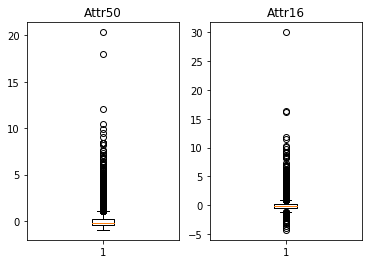

In [19]:

# box plots for the two features that have the most outliers
plt.subplot(1,2,1)
plt.boxplot(train_set['Attr50'])
plt.title('Attr50')

plt.subplot(1,2,2)
plt.boxplot(train_set['Attr16'])
plt.title('Attr16')
plt.show()


We can see there are a lot of outliers in the dataset. We cannot simply drop them or we will lost most of the information. We will instead see the correlations between each feature to the target to see if the features with high variance can explain the target well.

4.B Looking for correlations

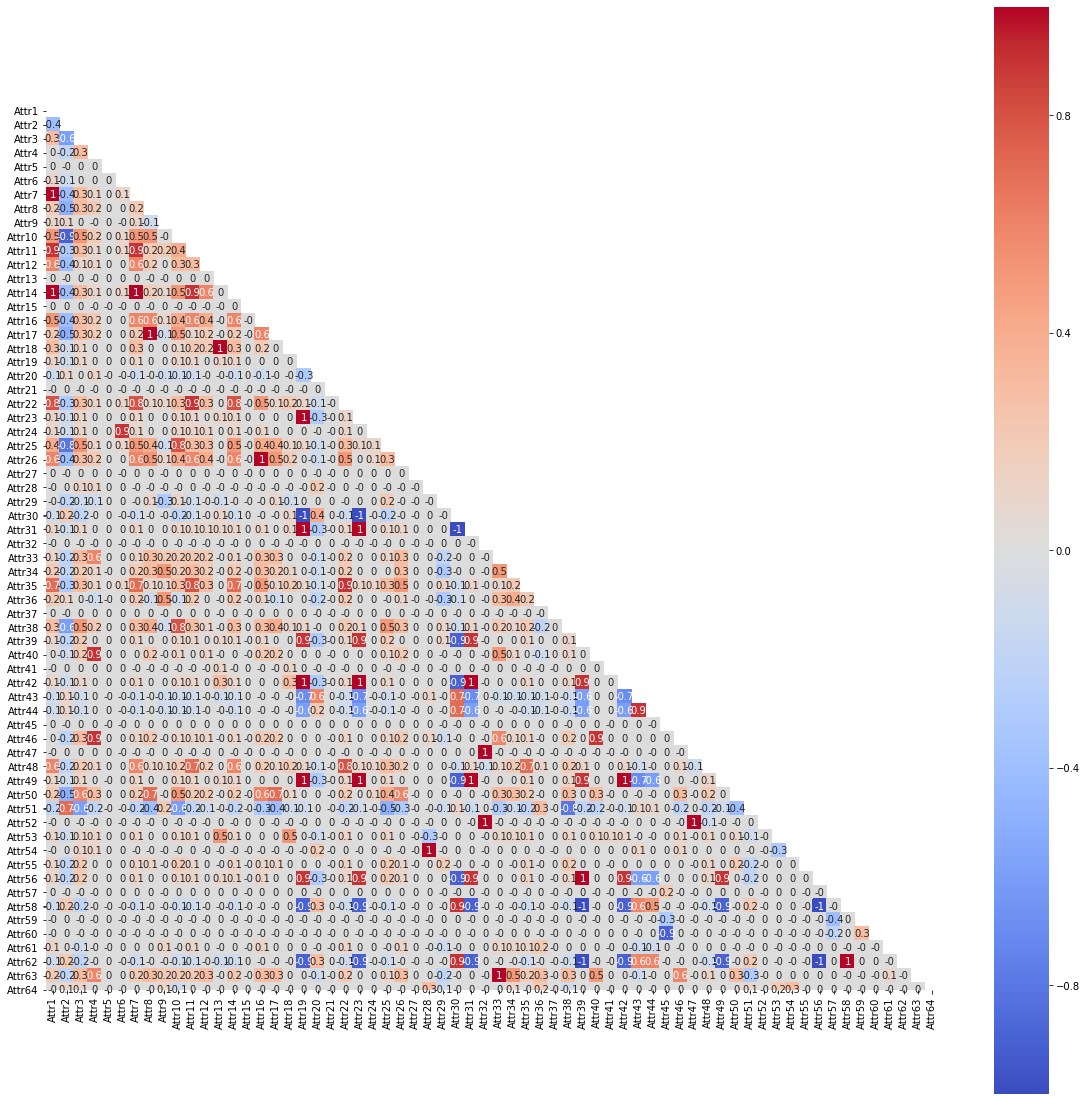

In [20]:
#let's see the correlation between the attributes to see if there are collinearity.
corr = round(train_set.iloc[:,:-1].corr(),1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
plt.show()
fig.savefig('heatmapplot.png')

It seems there are some features that are highly correlated to each other. We will drop the ones that have less strong relationship with the target in the pairs. Thus, we will only keep relatively independent features that have strong explaining power to the target

4.C Feature selection

In [21]:
#Use Anova f-test to see which attributes have the strongest relationship with the target
array = train_set.values
X = array[:,0:64]
Y = array[:,64]
test = SelectKBest(score_func=f_classif, k=30)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)


[7.370e+01 7.459e+01 6.302e+01 5.019e+00 1.536e-02 5.550e-01 7.406e+01
 1.493e+01 3.782e+00 5.095e+01 5.060e+01 6.569e+00 3.527e-02 7.408e+01
 1.573e-03 4.026e+01 1.645e+01 6.354e+00 2.567e-01 1.375e+00 5.851e-02
 6.260e+01 2.388e-01 1.542e-01 1.073e+02 4.142e+01 2.449e-02 7.002e-03
 1.342e+01 6.032e-02 2.255e-01 4.079e-05 7.752e+00 7.789e+00 8.771e+01
 7.433e-01 3.912e-03 4.872e+01 7.910e-01 1.770e+00 4.056e-01 1.896e-01
 1.189e-01 3.318e-02 7.248e-03 5.133e+00 5.210e-02 1.822e+01 9.744e-02
 2.552e+01 6.152e+01 3.175e-03 6.000e-02 9.473e-03 4.897e+00 9.197e-02
 1.299e-01 7.533e-02 3.826e-02 1.282e-01 2.045e-06 4.466e-02 1.150e+01
 2.138e+00]


In [22]:
#It seems 30 of the 64 features have relatively high correlations witht the target.

res = sorted(range(len(fit.scores_)), key = lambda sub: fit.scores_[sub])[-30:]
res_ = sorted(res)
res_

[0,
 1,
 2,
 3,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 15,
 16,
 17,
 21,
 24,
 25,
 28,
 32,
 33,
 34,
 37,
 39,
 45,
 47,
 49,
 50,
 54,
 62,
 63]

In [23]:
# 27 of out of the 30 attributes match with the top list of attributes that have the most outliers, meaning the
#outliers may be a key in interpreting the target
len(set(res_).intersection([x[0] for x in Counter(outlier[1]).most_common(30)]))

27

In [24]:
#put these 30 attributes into heatmap to learn their correlations
#corr = round(train_set.iloc[:,res_].corr(),1)
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
#fig, ax = plt.subplots(figsize=(20,20))
#heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
#plt.show()
#fig.savefig('heatmapplot1.png')

In [25]:
#loop over all the features that has over 0.95 score with another and drop the one that has weaker score
drop_list = []
train1 = train_set.copy()
for i in range(64):
    for l in range(64)[i+1:]:
        if np.abs(pearsonr(train1.iloc[:,i],train1.iloc[:,l])[0])>=0.95: 
            if fit.scores_[i]>fit.scores_[l]:
                drop_list.append(l)
            else:
                drop_list.append(i)
                  
drop_list = list(set(drop_list))                
    
len(drop_list)

17

In [26]:
#drop the highly correlated features
train1 = train1.drop(train1.columns[[drop_list]],axis=1)
train1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Attr2,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr11,Attr12,Attr14,...,Attr53,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
2902,0.157186,-3.048919,-0.318298,0.003689,-0.158332,-0.453939,-0.187967,-0.639661,-0.207486,-0.029719,...,-0.045918,-0.030434,-0.348770,0.415633,-0.038476,-0.044199,-0.046722,-0.626282,-0.043655,0
3952,0.029303,-1.634919,-0.286429,0.005816,-0.044461,-0.334772,-0.025993,-0.139941,-0.126636,0.003823,...,-0.029729,-0.024176,-0.251528,0.011462,-0.022079,-0.039190,-0.129738,-0.501505,-0.042629,0
4559,0.048200,0.732913,-0.070915,0.007729,0.034706,-0.372026,-0.067162,-0.024220,-0.096702,0.010063,...,0.002654,-0.001974,0.356561,0.016370,-0.013240,-0.036585,-0.227287,-0.176291,0.019315,0
946,0.068068,0.508361,0.164025,0.007667,-0.037777,-0.011250,-0.075097,-0.172318,-0.014897,0.002061,...,-0.032698,-0.015515,-0.101279,0.013942,0.013443,-0.041527,0.083620,0.502002,-0.038663,0
6231,-0.025378,-0.200234,-0.137498,0.007372,0.082833,0.083006,0.039790,2.004341,0.671990,0.119452,...,-0.020740,-0.018567,0.019392,0.052588,-0.018323,-0.035724,-0.194304,-0.138196,-0.039638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.011722,-0.199714,-0.144275,0.006732,0.003000,-0.370589,-0.009207,-0.279996,-0.135513,-0.003730,...,-0.024838,-0.018564,-0.095211,0.005159,-0.013928,-0.044937,-0.195252,-0.429421,-0.043808,0
5709,-0.000624,-0.191590,-0.138381,0.007043,-0.016047,-0.267357,0.011914,0.100092,-0.075787,0.005319,...,-0.023310,-0.018353,-0.117478,0.010377,-0.015317,-0.042991,-0.146691,-0.268737,-0.041479,0
6397,0.030140,1.327540,0.099075,0.108871,-0.016047,-0.315113,-0.027054,-0.180928,-0.148804,-0.006225,...,0.006371,0.004172,-0.054104,0.004375,-0.009755,-0.045750,-0.210957,-0.309147,-0.024430,0
2737,0.082520,0.670613,-0.087849,0.007341,0.038136,-0.373282,-0.098188,-0.138727,-0.124238,0.003888,...,-0.000437,0.004146,-0.103492,0.019900,-0.005153,-0.042026,-0.238922,-0.300622,0.026453,0


In [27]:
print(drop_list)


[0, 32, 6, 7, 41, 12, 15, 48, 61, 51, 22, 55, 57, 27, 29, 30, 31]


In [28]:
#corr = round(train1.iloc[:,:-1].corr(),2)
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
#fig, ax = plt.subplots(figsize=(20,20))
#heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
#plt.show()

In [29]:
#caculate the scores again for the left features
array1 = train1.values
X1 = array1[:,0:47]
Y1 = array1[:,47]
test1 = SelectKBest(score_func=f_classif, k=30)
fit1 = test1.fit(X1, Y1)

set_printoptions(precision=3)
print(fit1.scores_)

[7.459e+01 6.302e+01 5.019e+00 1.536e-02 5.550e-01 3.782e+00 5.095e+01
 5.060e+01 6.569e+00 7.408e+01 1.573e-03 1.645e+01 6.354e+00 2.567e-01
 1.375e+00 5.851e-02 6.260e+01 1.542e-01 1.073e+02 4.142e+01 2.449e-02
 1.342e+01 7.789e+00 8.771e+01 7.433e-01 3.912e-03 4.872e+01 7.910e-01
 1.770e+00 4.056e-01 1.189e-01 3.318e-02 7.248e-03 5.133e+00 5.210e-02
 1.822e+01 2.552e+01 6.152e+01 6.000e-02 9.473e-03 4.897e+00 1.299e-01
 3.826e-02 1.282e-01 2.045e-06 1.150e+01 2.138e+00]


In [30]:
#find out all the weak ones to the target
weak_list = [i for i in range(len(fit1.scores_)) if fit1.scores_[i]<0.1]
weak_list  


[3, 10, 15, 20, 25, 31, 32, 34, 38, 39, 42, 44]

In [31]:
#once again drop the weak ones 
train2 = train1.drop(train1.columns[[weak_list]],axis=1)
train2

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Attr2,Attr3,Attr4,Attr6,Attr9,Attr10,Attr11,Attr12,Attr14,Attr17,...,Attr46,Attr48,Attr50,Attr51,Attr55,Attr57,Attr60,Attr63,Attr64,class
2902,0.157186,-3.048919,-0.318298,-0.158332,-0.453939,-0.187967,-0.639661,-0.207486,-0.029719,-0.616887,...,-0.286901,-0.652231,-0.719139,2.509722,-0.348770,0.415633,-0.044199,-0.626282,-0.043655,0
3952,0.029303,-1.634919,-0.286429,-0.044461,-0.334772,-0.025993,-0.139941,-0.126636,0.003823,-0.368473,...,-0.244082,0.063364,-0.608277,0.836144,-0.251528,0.011462,-0.039190,-0.501505,-0.042629,0
4559,0.048200,0.732913,-0.070915,0.034706,-0.372026,-0.067162,-0.024220,-0.096702,0.010063,-0.423269,...,-0.005767,0.199750,-0.044032,0.505892,0.356561,0.016370,-0.036585,-0.176291,0.019315,0
946,0.068068,0.508361,0.164025,-0.037777,-0.011250,-0.075097,-0.172318,-0.014897,0.002061,-0.471622,...,0.057123,-0.354946,-0.558890,-0.987883,-0.101279,0.013942,-0.041527,0.502002,-0.038663,0
6231,-0.025378,-0.200234,-0.137498,0.082833,0.083006,0.039790,2.004341,0.671990,0.119452,-0.130720,...,-0.091453,1.766345,-0.353648,-0.394102,0.019392,0.052588,-0.035724,-0.138196,-0.039638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.011722,-0.199714,-0.144275,0.003000,-0.370589,-0.009207,-0.279996,-0.135513,-0.003730,-0.307394,...,-0.172299,-0.077282,-0.425406,-0.229262,-0.095211,0.005159,-0.044937,-0.429421,-0.043808,0
5709,-0.000624,-0.191590,-0.138381,-0.016047,-0.267357,0.011914,0.100092,-0.075787,0.005319,-0.257052,...,-0.162760,0.230912,-0.422854,-0.343407,-0.117478,0.010377,-0.042991,-0.268737,-0.041479,0
6397,0.030140,1.327540,0.099075,-0.016047,-0.315113,-0.027054,-0.180928,-0.148804,-0.006225,-0.371137,...,0.017851,-0.012597,-0.011866,-0.291404,-0.054104,0.004375,-0.045750,-0.309147,-0.024430,0
2737,0.082520,0.670613,-0.087849,0.038136,-0.373282,-0.098188,-0.138727,-0.124238,0.003888,-0.502082,...,-0.065257,0.150521,-0.134570,0.720609,-0.103492,0.019900,-0.042026,-0.300622,0.026453,0


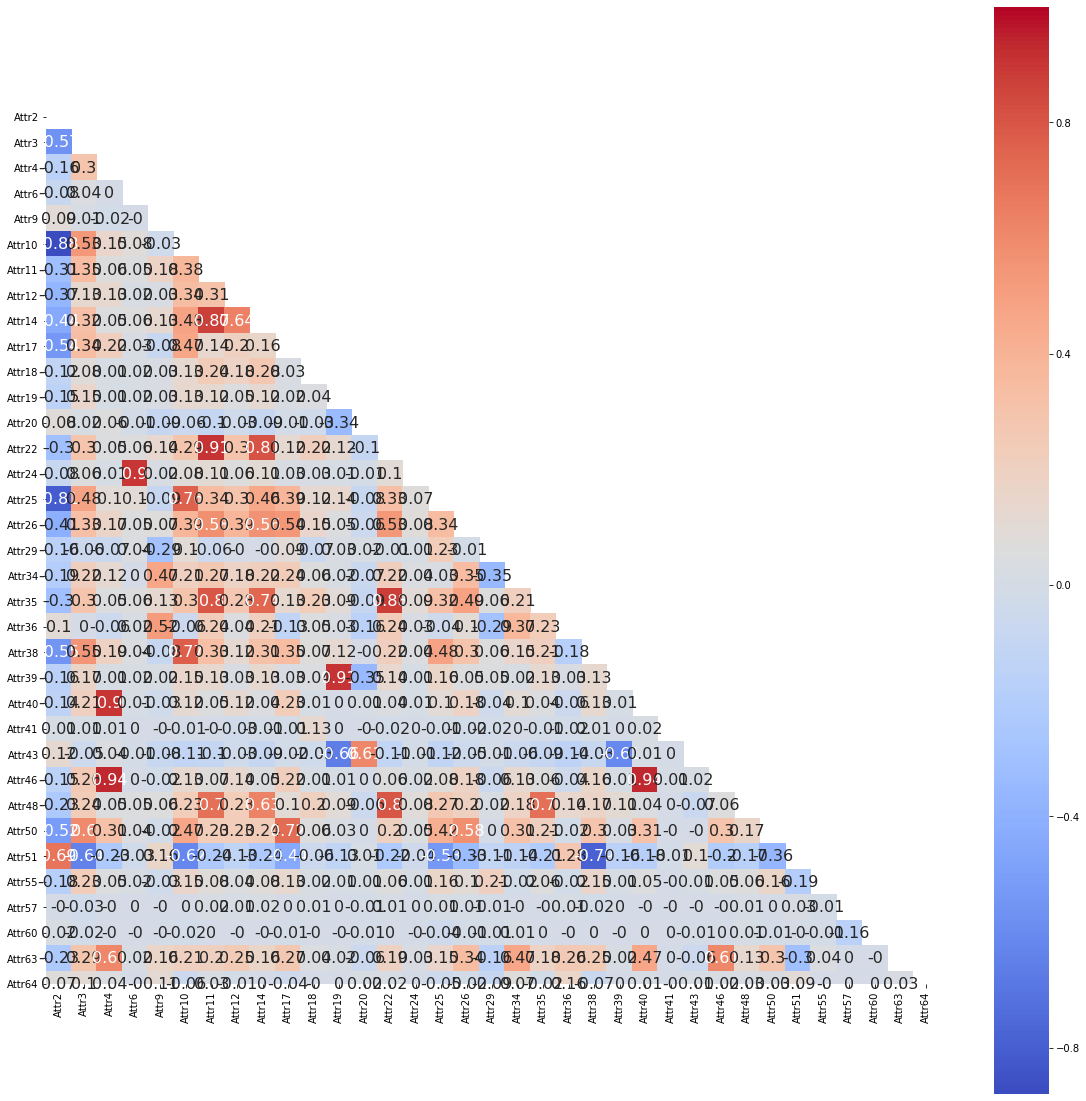

In [36]:
corr = round(train2.iloc[:,:-1].corr(),2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax,annot_kws={"size": 16})
plt.show()


4.D Dealing with data imbalance

I will use SMOTE, random oversampling and random downsampling to fix the data imbalance. Compare the evaluation metrics of these three methods with the unbalanced dataset and see which one is the best

In [46]:
smote = SMOTE(ratio='minority',random_state=24)
X = train2.iloc[:,:35]
y = train2['class']
X_smote , y_smote = smote.fit_resample(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [47]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state=24)
X_over , y_over = oversample.fit_resample(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=24)
X_under , y_under = undersample.fit_resample(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


5. Selecting models

5.A Gaussian Naive Bayes classifier

In [50]:
# Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()

5.B Support vector machine(SVM) classifier

In [51]:
svm_clf = SVC()

5.C Logistic Regression classifier

In [52]:
log_clf = LogisticRegression(random_state = 24)

5.D Decision Tree classifier

In [55]:
dt_clf = DecisionTreeClassifier(random_state=24)

5.E Adaboost classifier

In [54]:
ada_clf = AdaBoostClassifier(random_state=24)

5.F Random Forest classifier

In [101]:
rf_clf = RandomForestClassifier(n_estimators = 5, random_state=24)

5.G Balanced Bagging classifier

In [123]:
bb_clf = BalancedBaggingClassifier()

H. Selecting evaluation metrics

For evaluation metrics, because of the imbalance in the dataset, accuracy score is not a fair metric to select the best model.Instead  I will use accuracy score, recall score, precision score and ROC AUC score as metrics. If a company is predicted to go bankruptcy, this prediction will raise a big red flag and may cause big decisions to be made. Thus, spotting all the positives is the most important goal here. The recall score will be a more important metric to be considered here.

6. Selecting models and fine_tuning hyperparameters

In [119]:
# 4 sets of data(SMOTE, random oversampled,random under sampled,and the original imbalanced) 7 models(listed below), 
#4 metrics(accuracy, recall,precison, roc_auc)

models_dict = OrderedDict()

models_dict['Gaussian Naive Bayes'] = gnb_clf
models_dict['SVM'] = svm_clf
models_dict['Logistic Regression'] = log_clf
models_dict['Decision Tree'] = dt_clf
models_dict['Adaboost'] = ada_clf
models_dict['Random Forest'] = rf_clf
models_dict['Balanced bagging'] = bb_clf




In [120]:
def select_model(X, y, models, k_folds):
    model_results = OrderedDict()
    
    for model_name, model in models.items():
        metrics = OrderedDict()
        classifier_pipeline = make_pipeline(StandardScaler(),model)
        
        cv = StratifiedKFold(n_splits=k_folds)
        
        accuracy_scores = cross_val_score(classifier_pipeline, X, y, cv=cv, scoring='accuracy')
        
        metrics['accuracy'] = np.mean(accuracy_scores)
        
        recall_scores = cross_val_score(classifier_pipeline, X, y, cv=cv, scoring='recall')
        metrics['recall'] = np.mean(recall_scores)
        
        precision_scores = cross_val_score(classifier_pipeline, X, y, cv=cv, scoring='precision')
        metrics['precision'] = np.mean(precision_scores)
        
        roc_auc_scores = cross_val_score(classifier_pipeline,X, y, cv=cv, scoring='roc_auc')
        metrics['roc_auc_scores'] = np.mean(roc_auc_scores)
        
        model_results[model_name] = metrics
        
    return model_results
        
        


In [121]:
pd.DataFrame(select_model(X_smote, y_smote, models=models_dict, k_folds=5))

,Gaussian Naive Bayes,SVM,Logistic Regression,Decision Tree,Adaboost,Random Forest,Balanced bagging
accuracy,0.583312,0.903738,0.847282,0.948584,0.889002,0.972952,0.982393
recall,0.937101,0.975505,0.914646,0.963766,0.932382,0.988517,0.995918
precision,0.548788,0.853118,0.806081,0.935400,0.858035,0.958694,0.968875
roc_auc_scores,0.744608,0.965399,0.905985,0.948584,0.948384,0.994488,0.999261


In [125]:
pd.DataFrame(select_model(X_over, y_over, models=models_dict, k_folds=5))

,Gaussian Naive Bayes,SVM,Logistic Regression,Decision Tree,Adaboost,Random Forest,Balanced bagging
accuracy,0.549247,0.889831,0.838926,0.989793,0.918346,0.996938,0.998469
recall,0.921917,0.953432,0.903038,1.000000,0.964532,1.000000,1.000000
precision,0.528216,0.845860,0.800433,0.979998,0.882978,0.993914,0.996949
roc_auc_scores,0.723035,0.954870,0.902844,0.989793,0.963197,0.999490,1.000000


In [126]:
pd.DataFrame(select_model(X_under, y_under, models=models_dict, k_folds=5))

,Gaussian Naive Bayes,SVM,Logistic Regression,Decision Tree,Adaboost,Random Forest,Balanced bagging
accuracy,0.703510,0.743606,0.817788,0.743750,0.762500,0.719087,0.796394
recall,0.717235,0.814394,0.870644,0.752652,0.784659,0.728977,0.802652
precision,0.704524,0.719542,0.796078,0.741112,0.754912,0.729585,0.795934
roc_auc_scores,0.762103,0.834221,0.861245,0.743845,0.842353,0.804841,0.888447


In [128]:
pd.DataFrame(select_model(X, y, models=models_dict, k_folds=5))

,Gaussian Naive Bayes,SVM,Logistic Regression,Decision Tree,Adaboost,Random Forest,Balanced bagging
accuracy,0.218000,0.97975,0.978250,0.964500,0.977875,0.978625,0.816875
recall,0.895076,0.00000,0.012500,0.209091,0.036932,0.030492,0.722727
precision,0.022692,0.00000,0.080000,0.178147,0.160000,0.390000,0.080840
roc_auc_scores,0.694884,0.79991,0.862369,0.594594,0.863814,0.636536,0.873784


Balanced bagging seems to be the best model among all the four datasets. I will fine-tune the parameters within the different datasets using Grid search.

In [140]:
# Fine-tune Balanced bagging with SMOTE data
bb_clf_smote = BalancedBaggingClassifier()

param_grid = {'base_estimator':[RandomForestClassifier(criterion='entropy'),RandomForestClassifier,DecisionTreeClassifier],
              'n_estimators':[5,10,15]
               }
grid_SMOTE = GridSearchCV(bb_clf_smote,param_grid, cv=5,scoring = ['accuracy','recall','precision','roc_auc'],refit='recall')

grid_SMOTE.fit(X_smote, y_smote)

grid_SMOTE.best_params_

{'base_estimator': RandomForestClassifier(criterion='entropy'),
 'n_estimators': 10}

In [142]:
# Fine-tune Balanced bagging with ramdom oversampling data
bb_clf_over = BalancedBaggingClassifier()

param_grid = {'base_estimator':[RandomForestClassifier(criterion='entropy'),RandomForestClassifier,DecisionTreeClassifier],
              'n_estimators':[3,5,10]
               }
grid_over = GridSearchCV(bb_clf_over,param_grid, cv=5,scoring = ['accuracy','recall','precision','roc_auc'],refit='recall')

grid_over.fit(X_over, y_over)

grid_over.best_params_

{'base_estimator': RandomForestClassifier(criterion='entropy'),
 'n_estimators': 3}

In [144]:
# Fine-tune Balanced bagging with ramdom undersampling data
bb_clf_under = BalancedBaggingClassifier()

param_grid = {'base_estimator':[RandomForestClassifier(criterion='entropy'),RandomForestClassifier,DecisionTreeClassifier],
              'n_estimators':[15,20,30]
               }
grid_under = GridSearchCV(bb_clf_under,param_grid, cv=5,scoring = ['accuracy','recall','precision','roc_auc'],refit='recall')

grid_under.fit(X_under, y_under)

grid_under.best_params_

{'base_estimator': RandomForestClassifier(criterion='entropy'),
 'n_estimators': 20}

In [146]:
# Fine-tune Balanced bagging with imbalanced data
bb_clf_im = BalancedBaggingClassifier()

param_grid = {'base_estimator':[RandomForestClassifier(criterion='entropy'),RandomForestClassifier,DecisionTreeClassifier],
              'n_estimators':[30,35,40]
               }
grid_im = GridSearchCV(bb_clf_under,param_grid, cv=5,scoring = ['accuracy','recall','precision','roc_auc'],refit='recall')

grid_im.fit(X, y)

grid_im.best_params_

{'base_estimator': RandomForestClassifier(criterion='entropy'),
 'n_estimators': 35}

7. Evaluate final models on test set

In [178]:
#prepare the test set
X_test = test_set.iloc[:,:64]
y_test = test_set[['class']]

scaler = StandardScaler().fit(train2.iloc[:,:-1])
X_test_selected = X_test.loc[:,train2.columns[:-1]]

X_test_selected_scaled = scaler.transform(X_test_selected)



In [175]:
def select_final_model(X, y, models):
    model_results = OrderedDict()
    
    for model_name, model in models.items():
        metrics = OrderedDict()
       
        y_pred = model.predict(X)
        
        metrics['accuracy'] = accuracy_score(y,y_pred)
        
        metrics['recall'] = recall_score(y,y_pred)
        
        metrics['precision'] = precision_score(y,y_pred)
        
        metrics['roc_auc_scores'] = roc_auc_score(y,y_pred)
        
        model_results[model_name] = metrics
        
    return model_results

model_final = {'SMOTE':grid_SMOTE.best_estimator_,'oversampling':grid_over.best_estimator_,
               'undersampling':grid_under.best_estimator_,'imbalanced':grid_im.best_estimator_}

pd.DataFrame(select_final_model(X_test_selected_scaled, y_test, models=model_final))

,SMOTE,oversampling,undersampling,imbalanced
accuracy,0.9795,0.9795,0.727000,0.828500
recall,0.0000,0.0000,0.780488,0.756098
precision,0.0000,0.0000,0.056239,0.085165
roc_auc_scores,0.5000,0.5000,0.753184,0.793056
